# Exploring Environmental, Infrastructural, and Behavioural Factors for Road Safety Analysis in Urban and Rural Areas

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
#Scaling
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import os
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'Datasets/Data.csv')
df.head()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.7700,1,321.592,1.1944,290.8570,160.4320,accidents,"Number of recorded accidents, as a positive in..."
1,11,9.5564,3.2757,5.452,4.0540,1,478.623,6.2960,931.8120,8.9108,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."
2,19,7.5879,2.0989,6.697,345.0000,0,364.476,2.8584,830.0860,5.5727,traffic_density,"Traffic density index, scale from 0 (low) to 1..."
3,23,6.3879,4.9188,9.412,4.7290,0,20.920,2.1065,813.1590,131.4520,traffic_lights,Proportion of traffic lights in the area (0 to...
4,23,2.4042,1.9610,7.393,1.7111,1,37.378,1.7028,1.4663,6.9610,pavement_quality,"Pavement quality, scale from 0 (very poor) to ..."


In [3]:
df.shape

(8756, 12)

In [4]:
df.size

105072

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB


In [6]:
df.columns

Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day', 'Variable', 'Description'],
      dtype='object')

In [7]:
df.describe()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
count,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000
mean,20.625400,5.447824,14.252526,93.292068,22.442655,0.694381,214.642085,33.859295,453.234313,83.650263
std,5.228151,2.595654,75.965008,224.170457,112.193426,0.460695,168.707336,140.048354,313.882642,97.819456
min,5.000000,1.002000,0.240000,0.000000,0.000000,0.000000,0.970000,0.000000,1.026700,0.120000
25%,17.000000,3.195450,3.320775,3.775500,2.103350,0.000000,12.508500,1.668975,169.455750,6.514825
50%,21.000000,5.428500,5.563200,6.502500,3.276150,1.000000,223.125500,2.356450,453.982000,12.184300
75%,24.000000,7.675675,7.890175,9.226000,4.425700,1.000000,360.944750,3.704250,729.150250,174.777000
max,35.000000,9.997500,996.000000,999.000000,994.000000,1.000000,932.000000,999.000000,999.623000,999.000000


In [8]:
df.isnull().sum()

accidents              0
traffic_fine_amount    0
traffic_density        0
traffic_lights         0
pavement_quality       0
urban_area             0
average_speed          0
rain_intensity         0
vehicle_count          0
time_of_day            0
Variable               0
Description            0
dtype: int64

In [9]:
df.duplicated().sum()

0

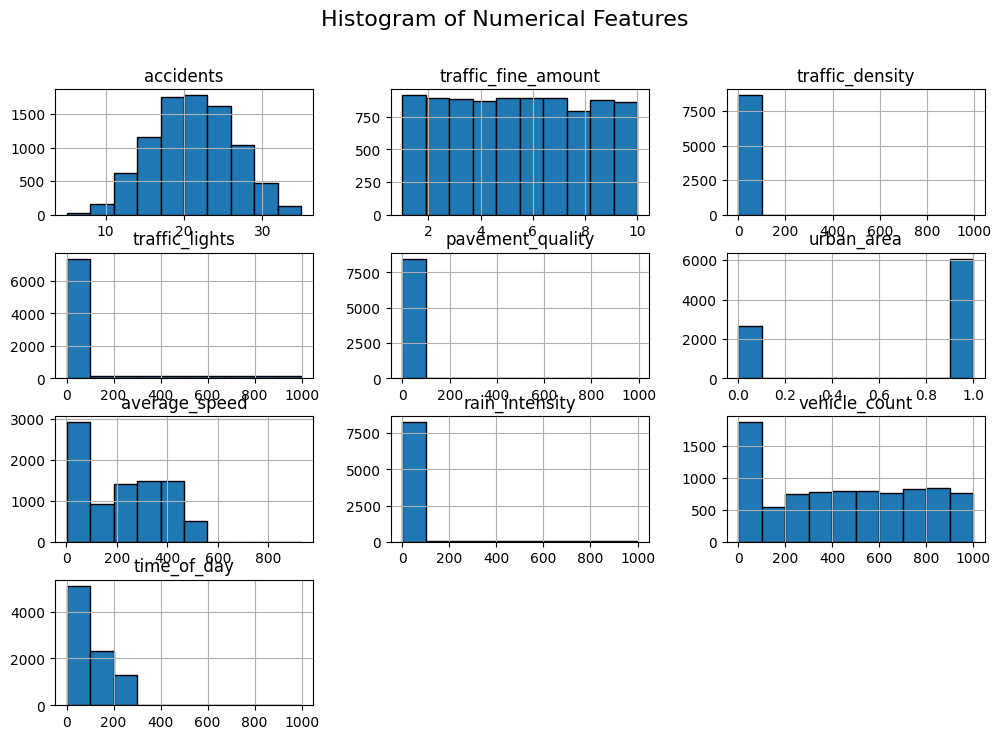

In [10]:
df.hist(figsize=(12, 8), bins=10, edgecolor="black")
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()

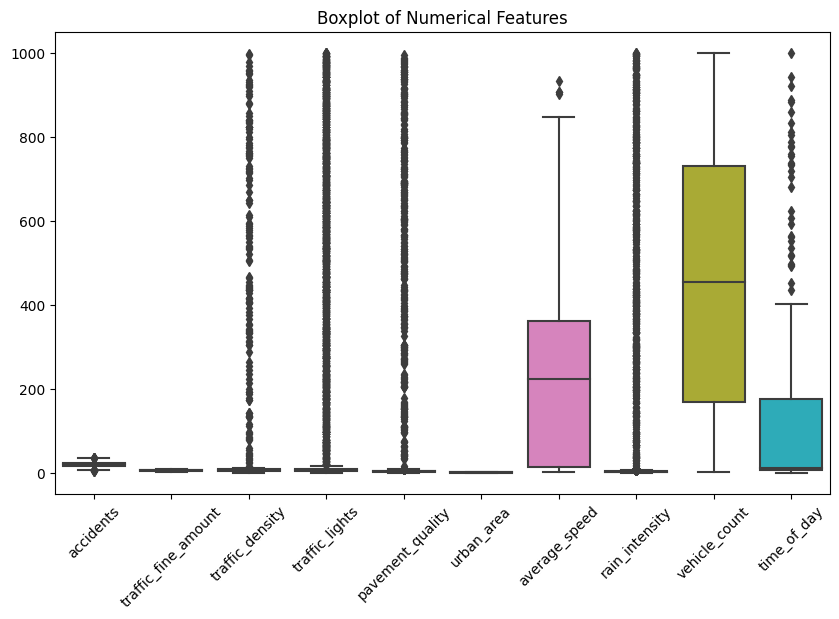

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


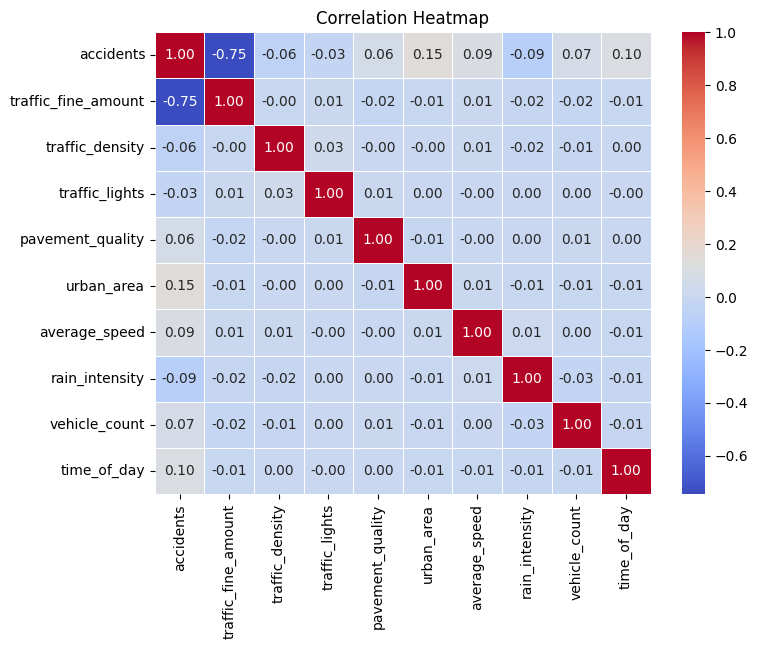

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


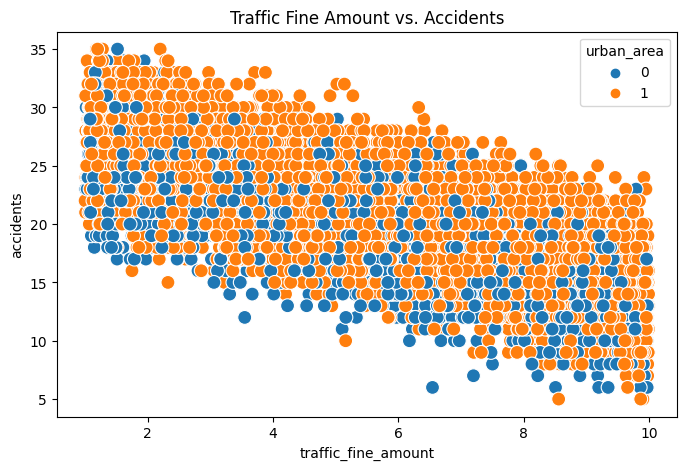

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="traffic_fine_amount", y="accidents", hue="urban_area", data=df, s=100)
plt.title("Traffic Fine Amount vs. Accidents")
plt.show()

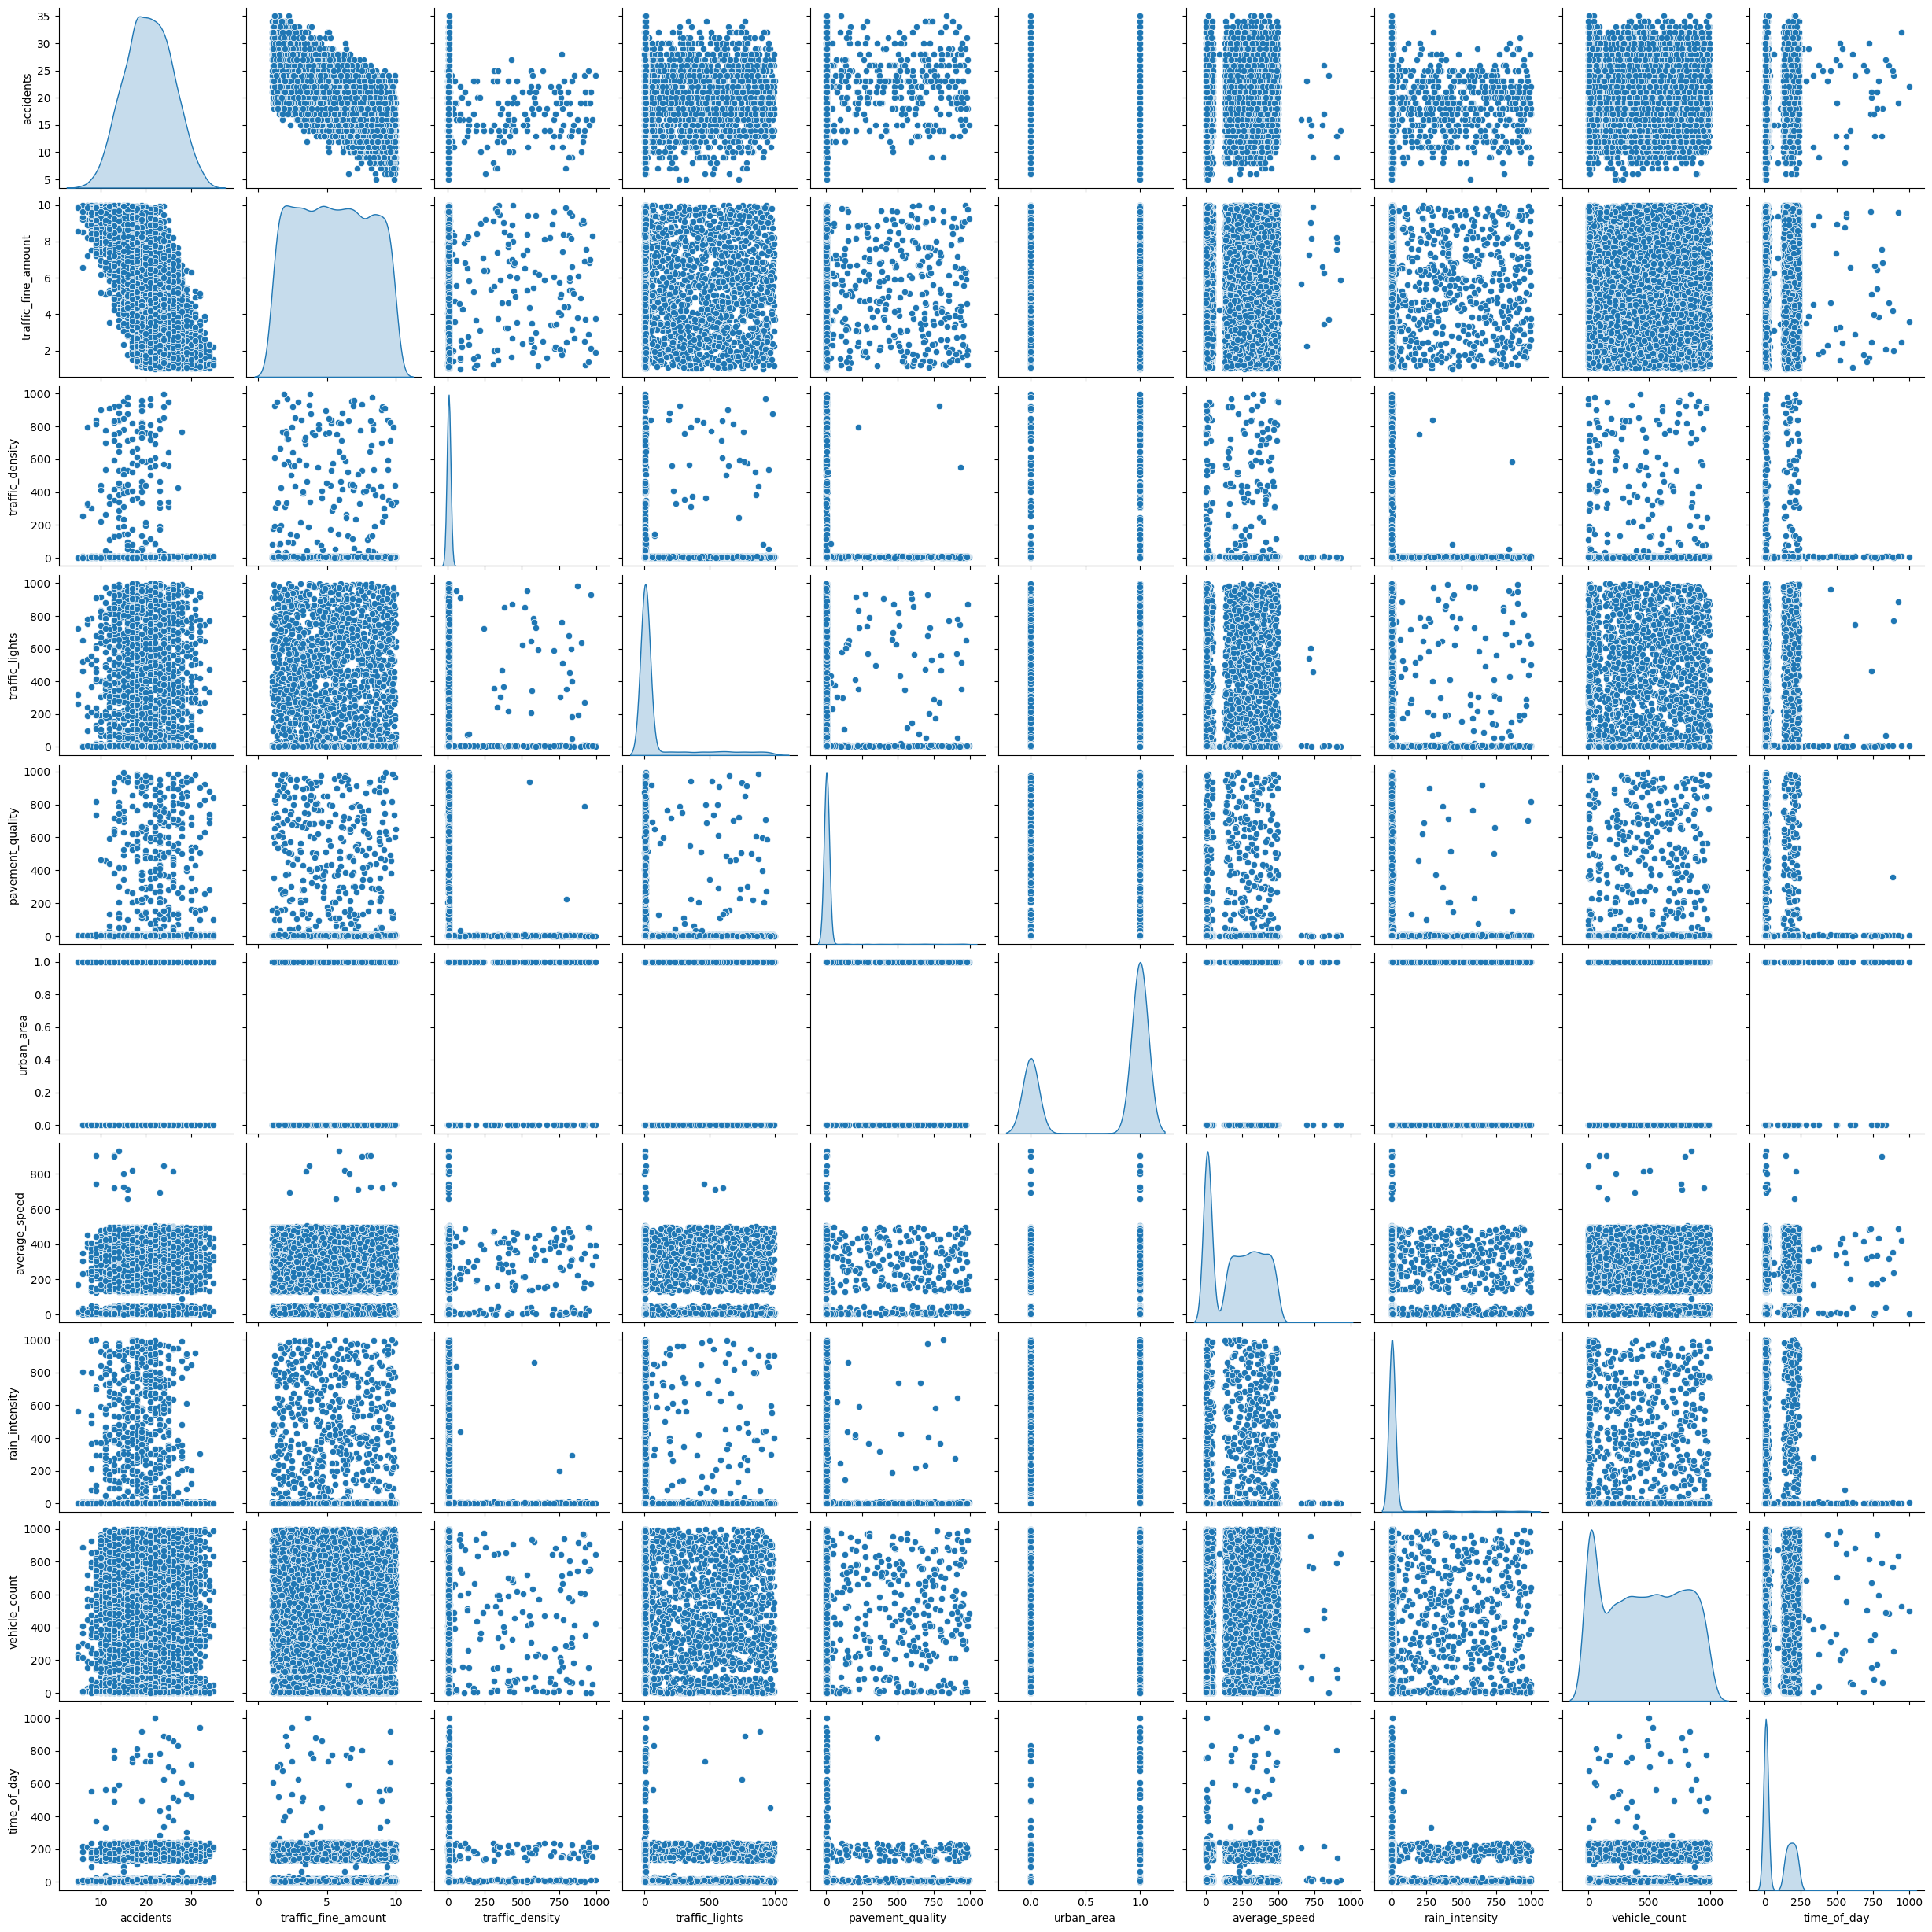

In [14]:
sns.pairplot(df, diag_kind="kde")
plt.show()

In [15]:
df

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,160.4320,accidents,"Number of recorded accidents, as a positive in..."
1,11,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,8.9108,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."
2,19,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,5.5727,traffic_density,"Traffic density index, scale from 0 (low) to 1..."
3,23,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,131.4520,traffic_lights,Proportion of traffic lights in the area (0 to...
4,23,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,6.9610,pavement_quality,"Pavement quality, scale from 0 (very poor) to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,11.1542,No Accident,0
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,17.0410,No Accident,0
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,192.7690,No Accident,0
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,3.6364,No Accident,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB


In [17]:
df

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,160.4320,accidents,"Number of recorded accidents, as a positive in..."
1,11,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,8.9108,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."
2,19,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,5.5727,traffic_density,"Traffic density index, scale from 0 (low) to 1..."
3,23,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,131.4520,traffic_lights,Proportion of traffic lights in the area (0 to...
4,23,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,6.9610,pavement_quality,"Pavement quality, scale from 0 (very poor) to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,11.1542,No Accident,0
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,17.0410,No Accident,0
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,192.7690,No Accident,0
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,3.6364,No Accident,0


In [18]:
df = df.drop(columns=['Description', 'Variable'])
df

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,20,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,160.4320
1,11,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,8.9108
2,19,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,5.5727
3,23,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,131.4520
4,23,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,6.9610
...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,11.1542
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,17.0410
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,192.7690
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,3.6364


In [19]:
y = df['accidents']
X = df.drop('accidents',axis=1)

In [20]:
X

,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,160.4320
1,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,8.9108
2,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,5.5727
3,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,131.4520
4,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,6.9610
...,...,...,...,...,...,...,...,...,...
8751,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,11.1542
8752,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,17.0410
8753,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,192.7690
8754,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,3.6364


In [21]:
# Scale the features
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42)

In [23]:
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

def calculateMetrics(algorithm,predict, testY):
    
        # Regression metrics
        mae = mean_absolute_error(testY, predict)
        mse = mean_squared_error(testY, predict)
        rmse = np.sqrt(mse)
        r2 = r2_score(testY, predict)
        
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        print(f"{algorithm} Mean Absolute Error (MAE): {mae:.2f}")
        print(f"{algorithm} Mean Squared Error (MSE): {mse:.2f}")
        print(f"{algorithm} Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"{algorithm} R-squared (R²): {r2:.2f}")
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=testY, y=predict, alpha=0.6)
        plt.plot([min(testY), max(testY)], [min(testY), max(testY)], 'r--', lw=2)  # Line of equality
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title(algorithm)
        plt.grid(True)
        plt.show()

Logistic Regression model loaded successfully.
Logistic Regression Mean Absolute Error (MAE): 2.60
Logistic Regression Mean Squared Error (MSE): 10.24
Logistic Regression Root Mean Squared Error (RMSE): 3.20
Logistic Regression R-squared (R²): 0.62


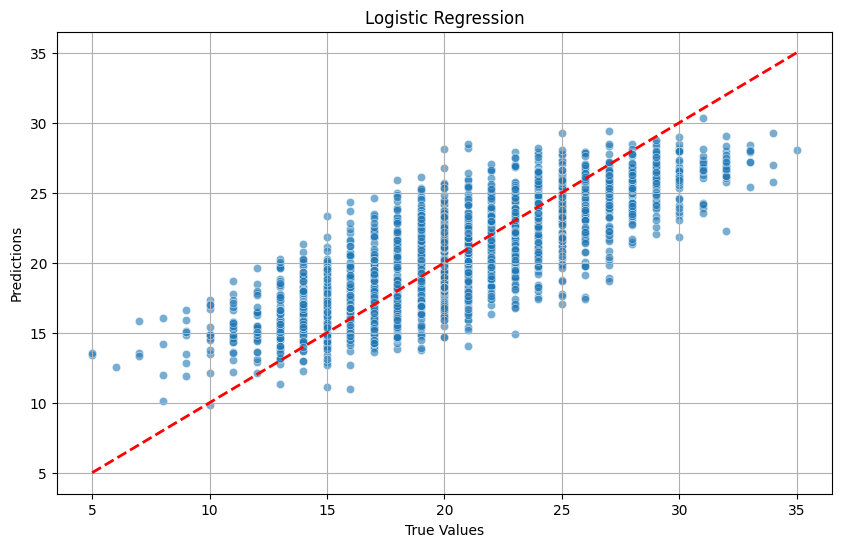

In [24]:
from sklearn.linear_model import LinearRegression
import joblib
import os

# Check if the model exists, and load it or train a new one
if os.path.exists('model/LogisticRegression.pkl'):
    lr = joblib.load('model/LogisticRegression.pkl')
    print("Logistic Regression model loaded successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("Logistic Regression", predict, y_test)
else:
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    joblib.dump(lr, 'model/LogisticRegression.pkl')
    print("Logistic Regression model saved successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("Logistic Regression", predict, y_test)


Random Forest Regressor model saved successfully.
Random Forest Regressor Mean Absolute Error (MAE): 1.78
Random Forest Regressor Mean Squared Error (MSE): 5.56
Random Forest Regressor Root Mean Squared Error (RMSE): 2.36
Random Forest Regressor R-squared (R²): 0.79


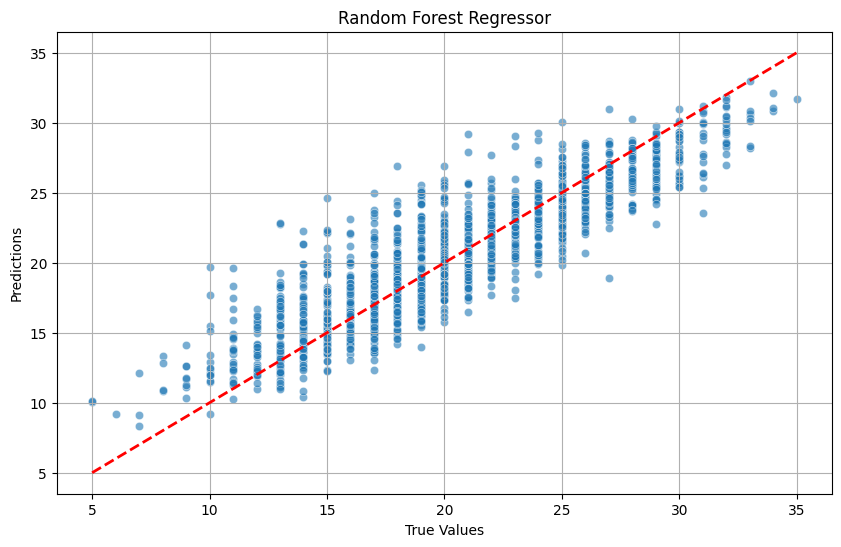

In [27]:
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

# Check if the model exists, and load it or train a new one
model_path = 'model/RandomForestRegressor.pkl'

if os.path.exists(model_path):
    rf = joblib.load(model_path)
    print("Random Forest Regressor model loaded successfully.")
    predict = rf.predict(X_test)
    calculateMetrics("Random Forest Regressor", predict, y_test)
else:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    joblib.dump(rf, model_path)
    print("Random Forest Regressor model saved successfully.")
    predict = rf.predict(X_test)
    calculateMetrics("Random Forest Regressor", predict, y_test)


In [32]:
test = pd.read_csv('Datasets/testdata.csv')
test

,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,1.3541,5.1314,286.000,1.9598,0,194.584,1.7183,740.639,5.8964
1,9.8258,9.7191,975.000,2.1557,1,17.803,8.3470,17.857,153.9580
2,3.4277,1.9423,7.027,3.4532,1,257.995,1.2724,697.939,186.4140
3,4.2632,6.3170,3.192,2.8022,0,442.185,1.5842,222.656,21.4640
4,2.3329,7.0684,5.634,1.3011,1,433.111,2.5020,993.635,6.9123
5,7.4591,3.5072,799.000,3.3744,0,293.302,2.6770,75.269,145.3360
6,8.7811,8.0850,5.532,1.0890,1,322.075,1.6420,136.298,8.3114
7,1.2031,6.8200,2.907,4.9104,0,441.616,2.9334,752.169,9.7890
8,9.1744,6.3800,9.733,2.1296,0,246.337,1.1326,547.824,208.8120
9,6.4874,5.0554,3.408,2.8144,1,334.048,1.9542,1.380,228.7160


In [33]:
testdata = scaler.transform(test)
testdata

array([[-1.57723544, -0.12007696,  0.8596982 , -0.18257776, -1.50733136,
        -0.11889957, -0.22951237,  0.91569607, -0.79491654],
       [ 1.68675213, -0.05968123,  3.93342771, -0.18083157,  0.66342413,
        -1.16681545, -0.18217816, -1.38714958,  0.71879108],
       [-0.77831614, -0.16206052, -0.38484105, -0.16926606,  0.66342413,
         0.25698581, -0.23269646,  0.77965019,  1.05060496],
       [-0.45641362, -0.10446888, -0.40194955, -0.17506887, -1.50733136,
         1.34882048, -0.23046995, -0.73464235, -0.6357612 ],
       [-1.2001221 , -0.09457692, -0.39105543, -0.18844921,  0.66342413,
         1.29503196, -0.22391613,  1.72176309, -0.78453049],
       [ 0.77490688, -0.14145907,  3.14826603, -0.16996846, -1.50733136,
         0.46627734, -0.22266649, -1.20423001,  0.63064407],
       [ 1.28424876, -0.08119368, -0.39151047, -0.1903398 ,  0.66342413,
         0.63683686, -0.23005722, -1.00978637, -0.77022679],
       [-1.63541292, -0.09784703, -0.40322097, -0.15627704, -1

In [35]:
test['prediction'] = rf.predict(testdata)
test

,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,prediction
0,1.3541,5.1314,286.000,1.9598,0,194.584,1.7183,740.639,5.8964,25.90
1,9.8258,9.7191,975.000,2.1557,1,17.803,8.3470,17.857,153.9580,15.82
2,3.4277,1.9423,7.027,3.4532,1,257.995,1.2724,697.939,186.4140,21.00
3,4.2632,6.3170,3.192,2.8022,0,442.185,1.5842,222.656,21.4640,19.85
4,2.3329,7.0684,5.634,1.3011,1,433.111,2.5020,993.635,6.9123,29.37
5,7.4591,3.5072,799.000,3.3744,0,293.302,2.6770,75.269,145.3360,17.17
6,8.7811,8.0850,5.532,1.0890,1,322.075,1.6420,136.298,8.3114,13.49
7,1.2031,6.8200,2.907,4.9104,0,441.616,2.9334,752.169,9.7890,29.56
8,9.1744,6.3800,9.733,2.1296,0,246.337,1.1326,547.824,208.8120,16.28
9,6.4874,5.0554,3.408,2.8144,1,334.048,1.9542,1.380,228.7160,20.11
